In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys

# Add the action_labeler package to Python path
sys.path.append("../")

In [3]:
from PIL import Image
from pathlib import Path
from matplotlib import pyplot as plt

from action_labeler.detections import Detection
from action_labeler.preprocessors import (
    MaskPreprocessor,
    BoundingBoxPreprocessor,
    CropPreprocessor,
    TextPreprocessor,
    ResizePreprocessor,
)

In [15]:
def plot_images_in_row(images: list[Image.Image], titles=None):
    fig, axes = plt.subplots(1, len(images), figsize=(15, 5))
    for i, (image, title) in enumerate(zip(images, titles)):
        axes[i].imshow(image)
        axes[i].set_title(title)
        axes[i].axis("off")
    plt.tight_layout()
    plt.show()

<Detection num_detections=2 image_size=(1151, 768)>
<Detection num_detections=2 image_size=(1151, 768)>


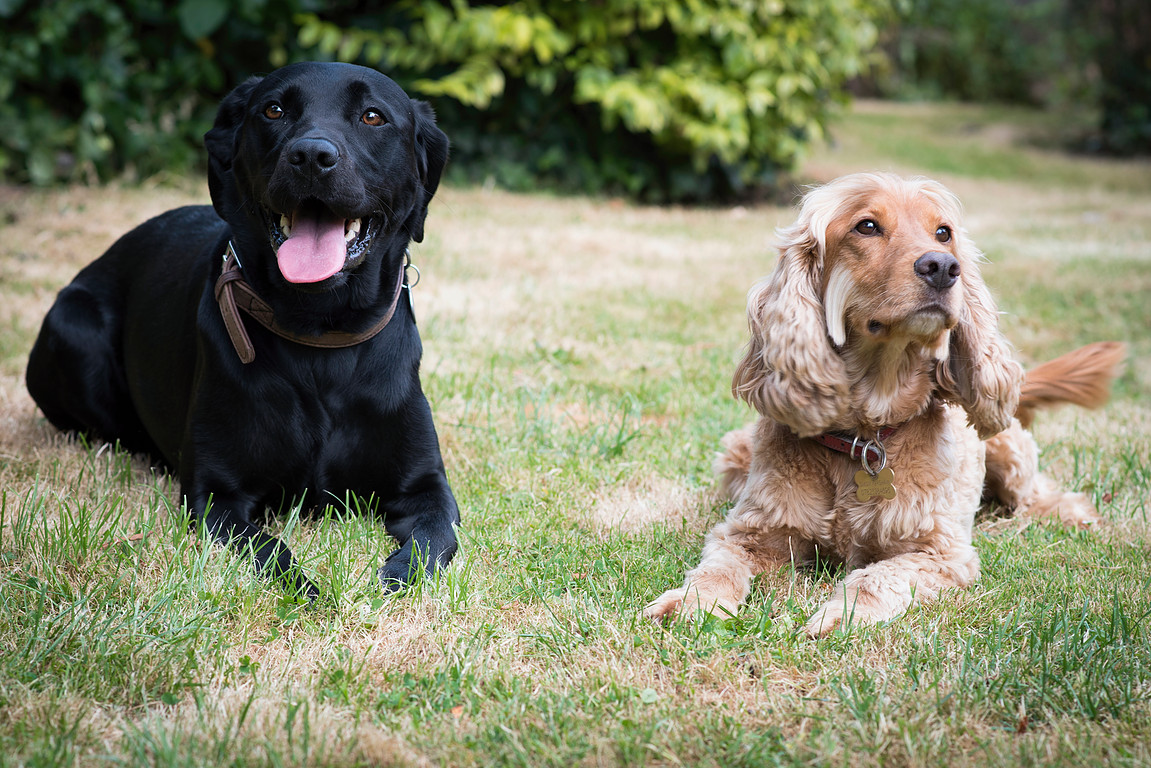

In [16]:
image_path = Path("./samples/images/dog_laying_down_1.jpg")
image = Image.open(image_path)

bounding_box_detections = Detection.from_text_path(
    "./samples/detect/dog_laying_down_1.txt", image.size
)
segmentation_detections = Detection.from_text_path(
    "./samples/segment/dog_laying_down_1.txt", image.size
)

print(bounding_box_detections)
print(segmentation_detections)


image.show()

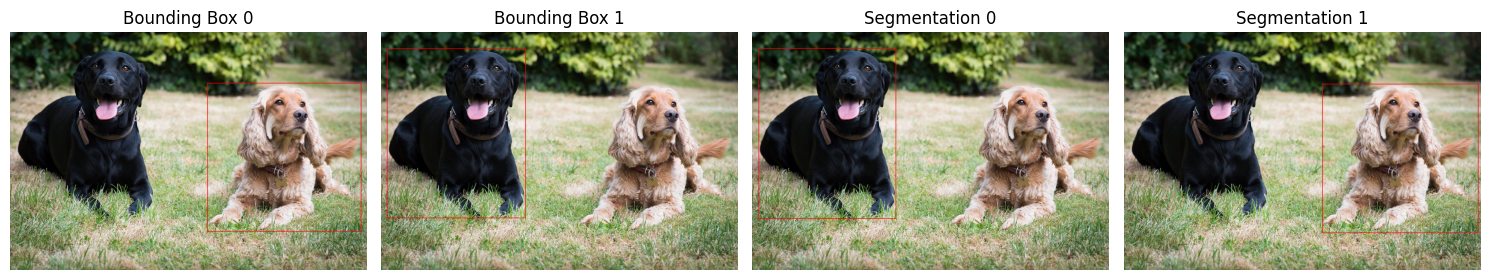

In [18]:
plot_images_in_row(
    [
        BoundingBoxPreprocessor().preprocess(
            image,
            0,
            bounding_box_detections,
        ),
        BoundingBoxPreprocessor().preprocess(
            image,
            1,
            bounding_box_detections,
        ),
        BoundingBoxPreprocessor().preprocess(
            image,
            0,
            segmentation_detections,
        ),
        BoundingBoxPreprocessor().preprocess(
            image,
            1,
            segmentation_detections,
        ),
    ],
    titles=["Bounding Box 0", "Bounding Box 1", "Segmentation 0", "Segmentation 1"],
)

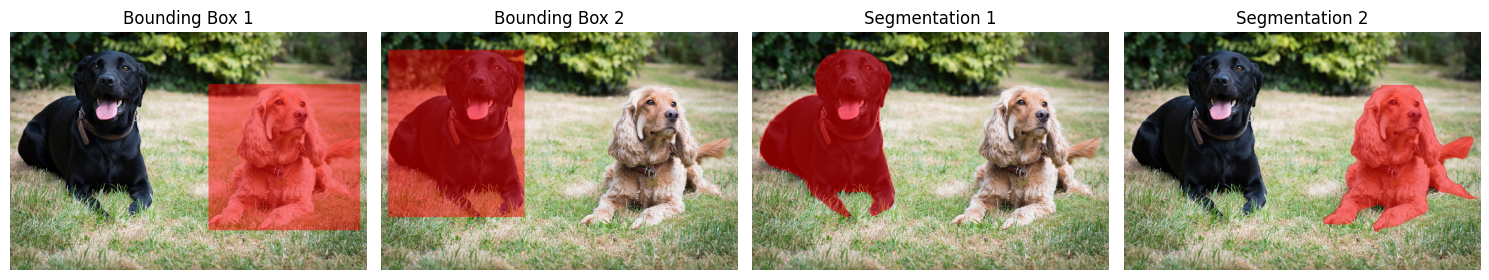

In [19]:
plot_images_in_row(
    [
        MaskPreprocessor().preprocess(
            image,
            0,
            bounding_box_detections,
        ),
        MaskPreprocessor().preprocess(
            image,
            1,
            bounding_box_detections,
        ),
        MaskPreprocessor().preprocess(
            image,
            0,
            segmentation_detections,
        ),
        MaskPreprocessor().preprocess(
            image,
            1,
            segmentation_detections,
        ),
    ],
    titles=["Bounding Box 1", "Bounding Box 2", "Segmentation 1", "Segmentation 2"],
)

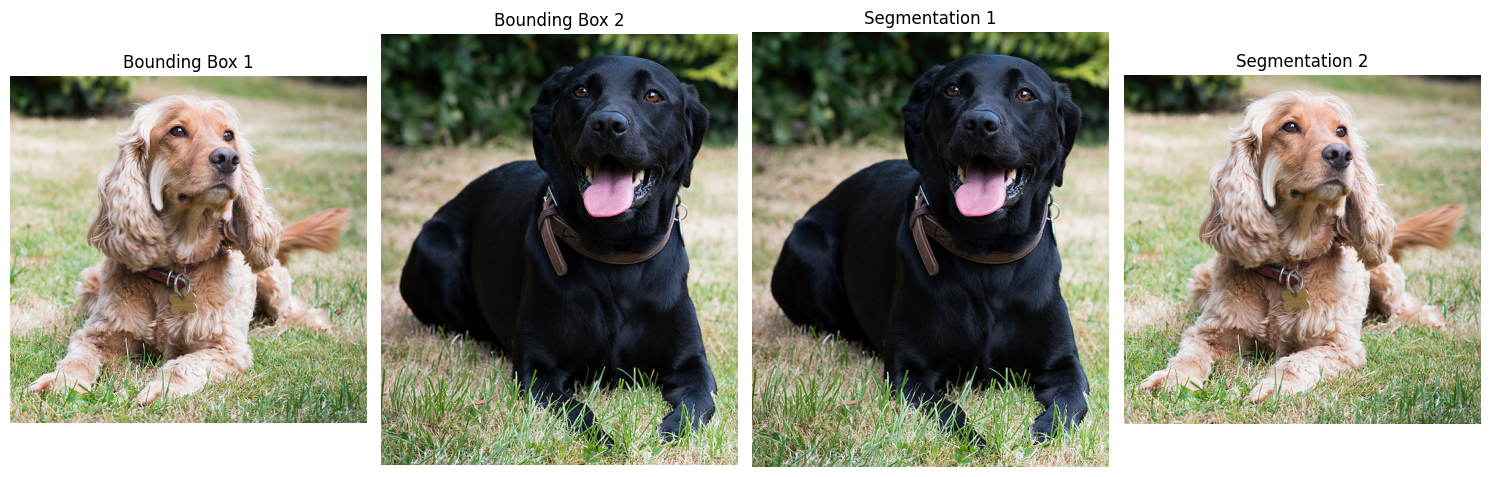

In [20]:
plot_images_in_row(
    [
        CropPreprocessor().preprocess(
            image,
            0,
            bounding_box_detections,
        ),
        CropPreprocessor().preprocess(
            image,
            1,
            bounding_box_detections,
        ),
        CropPreprocessor().preprocess(
            image,
            0,
            segmentation_detections,
        ),
        CropPreprocessor().preprocess(
            image,
            1,
            segmentation_detections,
        ),
    ],
    titles=["Bounding Box 1", "Bounding Box 2", "Segmentation 1", "Segmentation 2"],
)

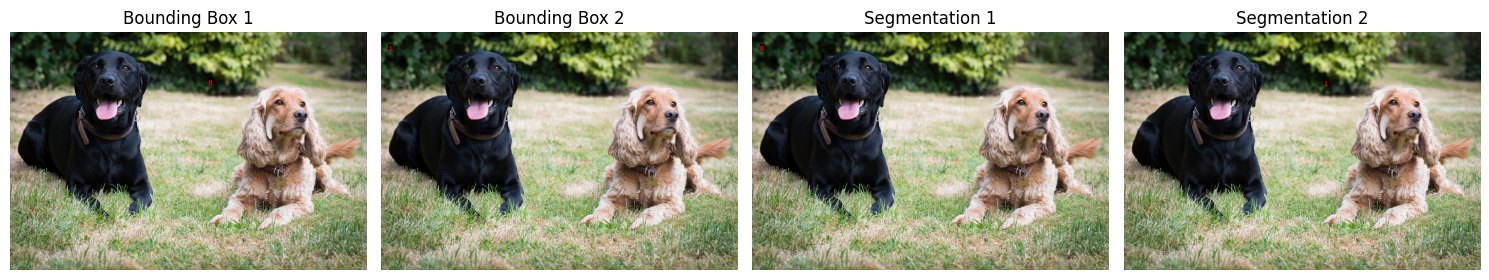

In [ ]:
plot_images_in_row(
    [
        TextPreprocessor().preprocess(
            image,
            0,
            bounding_box_detections,
        ),
        TextPreprocessor().preprocess(
            image,
            1,
            bounding_box_detections,
        ),
        TextPreprocessor().preprocess(
            image,
            0,
            segmentation_detections,
        ),
        TextPreprocessor().preprocess(
            image,
            1,
            segmentation_detections,
        ),
    ],
    titles=["Bounding Box 1", "Bounding Box 2", "Segmentation 1", "Segmentation 2"],
)

In [23]:
print(image.size)

print(
    ResizePreprocessor(size=640)
    .preprocess(
        image,
        0,
        bounding_box_detections,
    )
    .size
)

(1151, 768)
(640, 427)
